In [1]:
%load_ext autoreload

import time

import struct
import array
import gc

import numpy as np
import matplotlib.pylab as plt

from mim_data_utils import DataLogger, DataReader

np.set_printoptions(suppress=True, precision=2)
from scipy.spatial.transform import Rotation
from scipy.stats import describe

# Statistics

In [3]:
V = [  # Vertical line location and delay
    (111, 115),  # 4
    (210, 214),  # 4
    (310, 314),  # 4
    (410, 415),  # 5
    (506, 512),  # 6
    (610, 614),  # 4
    (713, 717),  # 4
] 
values = list(V[i][1] - V[i][0] for i in range(len(V)))
print(values)
print(describe(values))
print(f"total = {sum(values)}")

[4, 4, 4, 5, 6, 4, 4]
DescribeResult(nobs=7, minmax=(4, 6), mean=4.428571428571429, variance=0.6190476190476191, skewness=1.3577270894181963, kurtosis=0.233727810650886)
total = 31


# All Plots

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


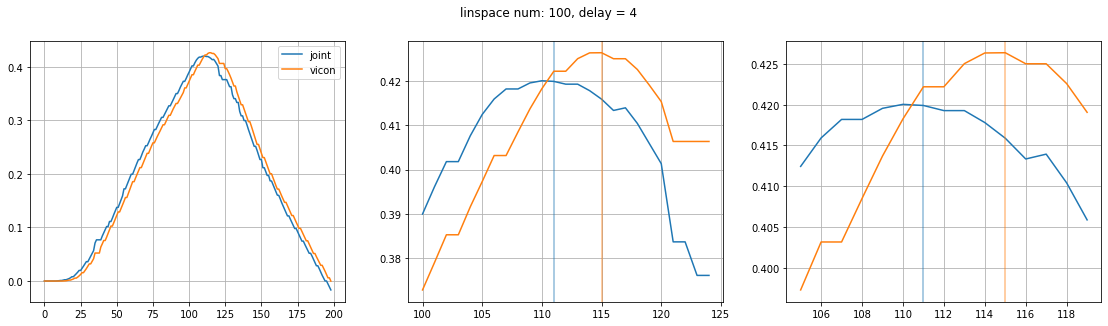

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


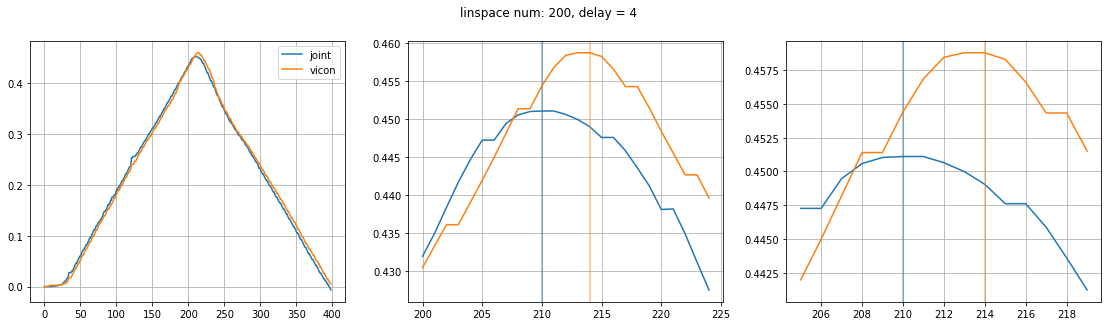

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


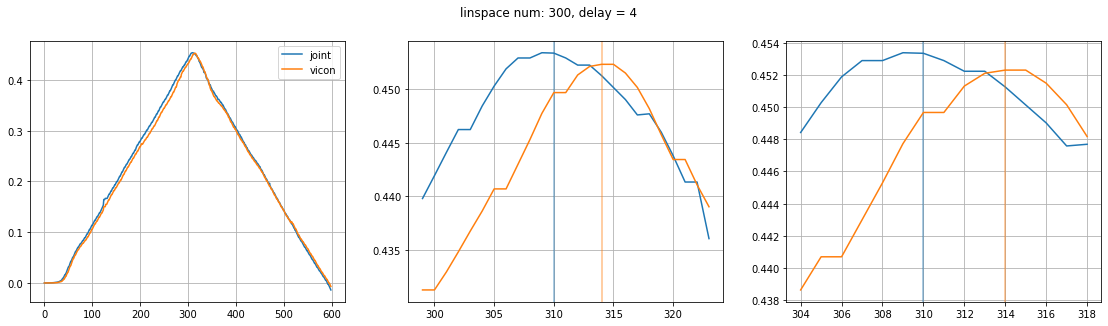

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


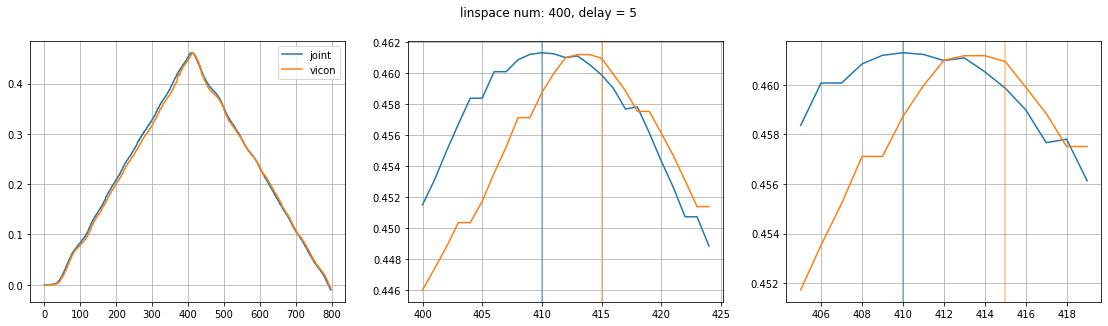

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


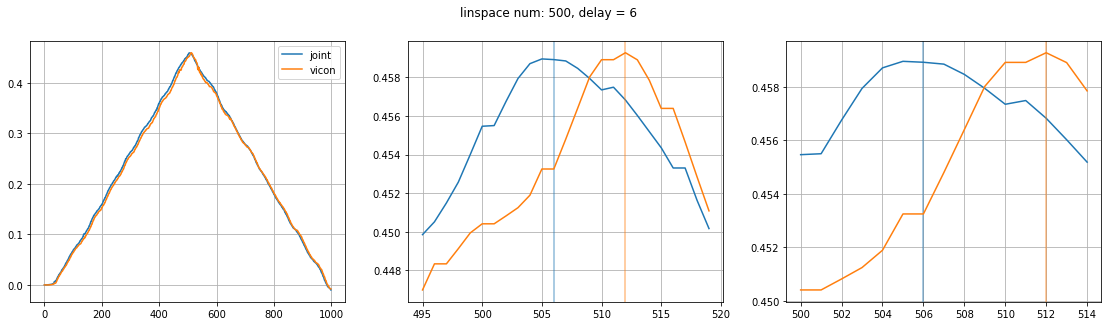

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


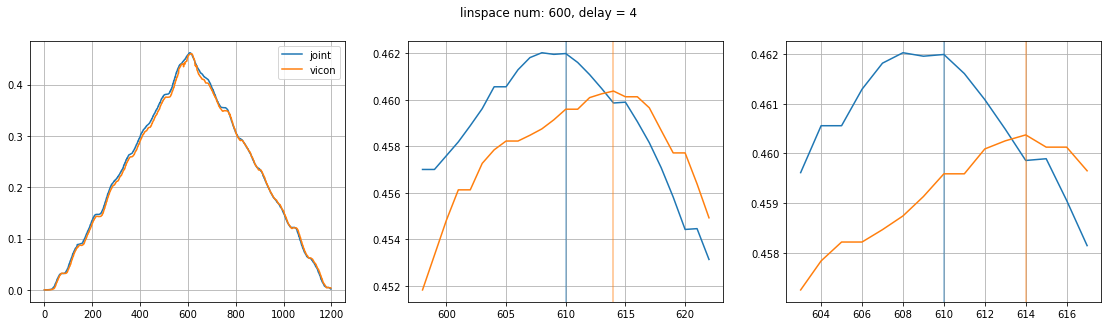

idx: 0 fields: 11
[('joint_positions', 8), ('joint_velocities', 8), ('slider_positions', 4), ('zero_pos', 8), ('slider_zero_pos', 8), ('vicon_solo', 13), ('vicon_leg_fr', 13), ('vicon_leg_hl', 13), ('vicon_leg_hr', 13), ('des_position', 8), ('tau', 8)]


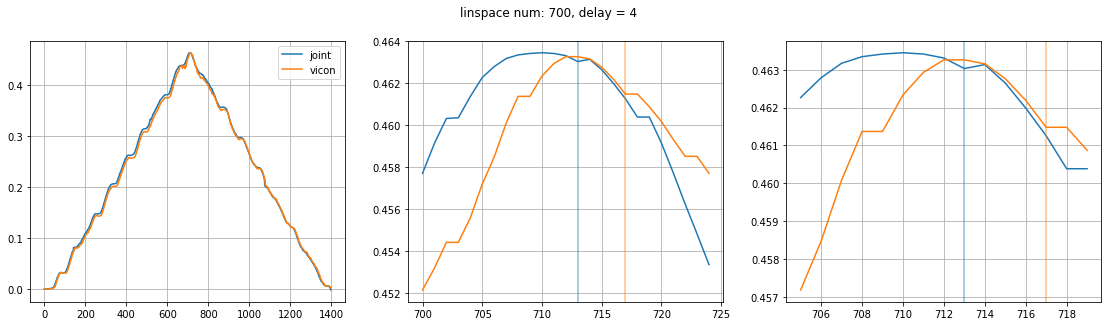

In [4]:
for i in range(1, 7+1):
    r = DataReader(f'num={i*100}.mds')
    j = r.data['joint_positions'][:,4:6] - r.data['zero_pos'][:,4:6]
    j = j[:,1] + j[:,0]
    e = Rotation.from_quat(r.data['vicon_leg_hl'][:,3:7]).as_euler('xyz')[:,1]
    e -= e[0]
    e *= -1
    
    # horizontal subplots
    fig, (f1, f2, f3) = plt.subplots(1,3,figsize=(19.2,4.8))  # triple width
    fig.suptitle(f'linspace num: {i*100}, delay = {V[i-1][1] - V[i-1][0]}')
    
    m = np.argmax(j)
    
    f1.plot(j)
    f1.plot(e)
    f1.grid()
    f1.legend(('joint', 'vicon'))
    
    s = slice(m-10,m+15)
    f2.plot(np.arange(s.start, s.stop), j[s])
    f2.axvline(x=V[i-1][0], color='C0', alpha=0.5)
    f2.plot(np.arange(s.start, s.stop), e[s])
    f2.axvline(x=V[i-1][1], color='C1', alpha=0.5)
    f2.grid()
    
    s = slice(m-5,m+10) 
    f3.plot(np.arange(s.start, s.stop), j[s])
    f3.axvline(x=V[i-1][0], color='C0', alpha=0.5)
    f3.plot(np.arange(s.start, s.stop), e[s])
    f3.axvline(x=V[i-1][1], color='C1', alpha=0.5)
    f3.grid()
    
    plt.show()